In [1]:
import pandas as pd
ratings = pd.read_csv("/Users/sivamaichi/Desktop/ml-latest-small/ratings.csv")
movies = pd.read_csv("/Users/sivamaichi/Desktop/ml-latest-small/movies.csv")
tags = pd.read_csv("/Users/sivamaichi/Desktop/ml-latest-small/tags.csv")

In [2]:
print(ratings.isnull().sum())
print(movies.isnull().sum())
print(tags.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [3]:
print("Total number of ratings:", len(ratings))
print("Number of unique users:", ratings['userId'].nunique())
print("Number of unique movies:", ratings['movieId'].nunique())
print("Minimum rating:", ratings['rating'].min())
print("Maximum rating:", ratings['rating'].max())
print("Average rating:", ratings['rating'].mean())

Total number of ratings: 100836
Number of unique users: 610
Number of unique movies: 9724
Minimum rating: 0.5
Maximum rating: 5.0
Average rating: 3.501556983616962


In [4]:
print("Number of movies:", len(movies))
print("Number of unique genres:", movies['genres'].nunique())

Number of movies: 9742
Number of unique genres: 951


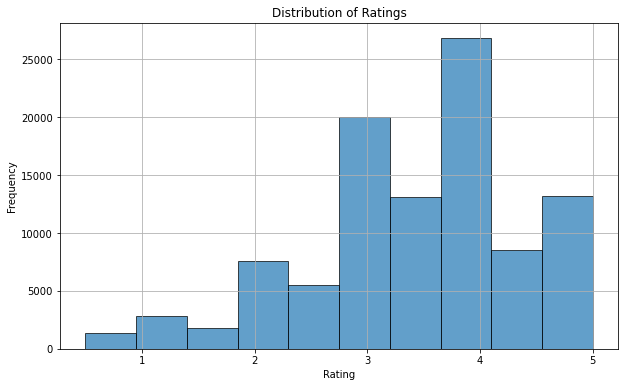

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

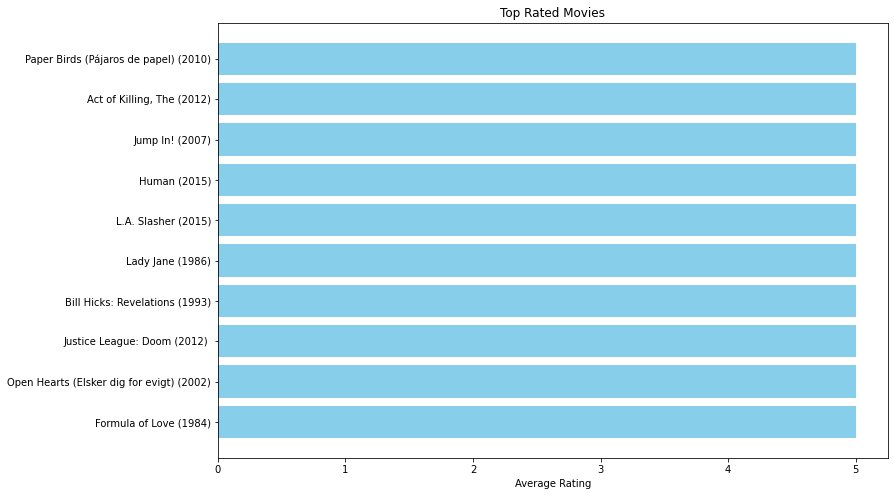

In [7]:
average_ratings = ratings.groupby('movieId')['rating'].mean()
top_rated_movies = average_ratings.sort_values(ascending=False).head(10)
top_rated_movies = pd.merge(top_rated_movies, movies, on='movieId')
plt.figure(figsize=(12, 8))
plt.barh(top_rated_movies['title'], top_rated_movies['rating'], color='skyblue')
plt.gca().invert_yaxis() 
plt.xlabel('Average Rating')
plt.title('Top Rated Movies')
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

movies_path = "/Users/sivamaichi/Desktop/ml-latest-small/movies.csv"
movies = pd.read_csv(movies_path)

tfidf = TfidfVectorizer(stop_words='english')

movies['genres'] = movies['genres'].fillna('')

tfidf_matrix = tfidf.fit_transform(movies['genres'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def recommend_movies_based_on_genre(genre_query, cosine_sim=cosine_sim, movies=movies):
    
    genre_indices = movies[movies['genres'].str.contains(genre_query, case=False)].index

    average_scores = cosine_sim[genre_indices].mean(axis=0)

    movie_indices = average_scores.argsort()[::-1]  

    return movies.loc[movie_indices[:10], 'title'].tolist()

available_genres = movies['genres'].str.split('|').explode().unique()

print("Available genres:")
for genre in available_genres:
    print("-", genre)

genre_input = input("\nEnter a genre to get movie recommendations: ")
recommended_movies = recommend_movies_based_on_genre(genre_input)
print(f"\nRecommended Movies based on Genre '{genre_input}' Similarity:")
for movie in recommended_movies:
    print("-", movie)


/Users/sivamaichi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Available genres:
- Adventure
- Animation
- Children
- Comedy
- Fantasy
- Romance
- Drama
- Action
- Crime
- Thriller
- Horror
- Mystery
- Sci-Fi
- War
- Musical
- Documentary
- IMAX
- Western
- Film-Noir
- (no genres listed)



Enter a genre to get movie recommendations:  Sci-fi



Recommended Movies based on Genre 'Sci-fi' Similarity:
- Stargate: Continuum (2008)
- Buck Rogers in the 25th Century (1979)
- Babylon 5
- Alien from L.A. (1988)
- Mission to Mars (2000)
- Android (1982)
- Idaho Transfer (1973)
- Battle Beyond the Stars (1980)
- Doctor Who: A Christmas Carol (2010)
- Doctor Who: The Runaway Bride (2007)
